In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier

In [2]:
# Load the dataset
df = pd.read_csv('data.csv')

In [3]:
# Calculate the mean of numeric columns
numeric_means = df.select_dtypes(include=np.number).mean()

# Fill missing values in numeric columns with their respective means
df = df.fillna(numeric_means)

In [4]:
df.fillna(method='ffill', inplace=True)

In [5]:
print(df.isnull().sum())

DISBMONTH                        0
LOAN_NUMBER                      0
CD_SEGMENT                       0
PRODUCT_CODE                     0
ETC_NTC                          0
PAYMENT_TYPE                     0
CUST_PINCODE                     0
CUST_STATE                       0
MANUFACTURE_CODE                 0
TENUR                            0
ADVANCE_EMI_COUNT                0
EMI                              0
LTV                              0
ASSET_COST                       0
ACTUAL_LOAN_AMOUNT               0
DOWN_PAYMENT                     0
PAYNIMO_STATUS                   0
QUALIFICATION                    0
GENDER                           0
MARITALSTATUS                    0
CUST_AGE                         0
EMP_GRP                          0
MATCH_SCORE                      0
TOTAL_NO_LV_TRADELINES           0
BUREAU_VINTAGE_IN_MONTHS         0
NO_TRADELINES_OPENED_LAST_3M     0
TOTAL_NO_LV_CD                   0
TIME_SINCE_FIRST_CD_MONTHS       0
NO_CD_OPENED_LAST_3M

In [6]:
df

,DISBMONTH,LOAN_NUMBER,CD_SEGMENT,PRODUCT_CODE,ETC_NTC,PAYMENT_TYPE,CUST_PINCODE,CUST_STATE,MANUFACTURE_CODE,TENUR,...,TOTAL_NO_ENQ,TOTAL_NO_ENQ_LAST_3M,TOTAL_NO_ENQ_CD,TOTAL_NO_ENQ_CD_LAST_3M,TOTAL_NO_ENQ_SEC,TOTAL_NO_ENQ_SEC_LAST_3M,TOTAL_NO_ENQ_UNSEC,TOTAL_NO_ENQ_UNSEC_LAST_3M,BUREAU_SCORE,TARGET_VARIABLE
0,10/31/2022,1,MOBILE,MOBILE,NTC,ADM,517551.0,AP,OPPO,7.0,...,0,0,0,0,0,0,0,0,-1.000000,0
1,11/30/2022,2,MOBILE,MOBILE,ETC,ADM,517002.0,AP,SAMSUNG,6.0,...,4,2,3,2,0,0,4,2,697.000000,0
2,10/31/2022,3,MOBILE,MOBILE,ETC,ENCH,517132.0,AP,OPPO,8.0,...,0,0,0,0,0,0,0,0,759.000000,0
3,10/31/2022,4,MOBILE,MOBILE,ETC,ADM,517130.0,AP,OPPO,7.0,...,2,1,2,1,0,0,2,1,775.000000,0
4,10/31/2022,5,MOBILE,MOBILE,ETC,ADM,515212.0,AP,OPPO,7.0,...,8,2,2,0,2,0,4,0,708.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566097,12/31/2023,566098,Non-Mobile,FRIDGE,NTC,ADM,731238.0,WB,BOSCH,12.0,...,0,0,0,0,0,0,0,0,-1.000000,0
566098,12/31/2023,566099,Non-Mobile,FRIDGE,NTC,ADM,731302.0,WB,CDOEM,10.0,...,0,0,0,0,0,0,0,0,-1.000000,0
566099,12/31/2023,566100,Non-Mobile,FRIDGE,ETC,ADM,742302.0,WB,SAMSUNG,10.0,...,0,0,0,0,0,0,0,0,761.000000,0
566100,12/31/2023,566101,Non-Mobile,FRIDGE,ETC,ENCH,721144.0,WB,CDOEM,10.0,...,30,2,18,0,0,0,24,2,775.000000,0


In [7]:
# Convert date strings to datetime objects
df['DISBMONTH'] = pd.to_datetime(df['DISBMONTH'])

# Extract useful features from datetime
df['DISBMONTH_YEAR'] = df['DISBMONTH'].dt.year
df['DISBMONTH_MONTH'] = df['DISBMONTH'].dt.month
df['DISBMONTH_DAY'] = df['DISBMONTH'].dt.day

df = df.drop('DISBMONTH', axis=1)

# # Encode categorical features
# label_encoders = {}
# for feature in features:
#     if df[feature].dtype == 'object':
#         le = LabelEncoder()
#         df[feature] = le.fit_transform(df[feature])
#         label_encoders[feature] = le

In [8]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ['CD_SEGMENT', 'PRODUCT_CODE', 'ETC_NTC', 'PAYMENT_TYPE', 'CUST_STATE', 'MANUFACTURE_CODE',
                       'PAYNIMO_STATUS', 'QUALIFICATION', 'GENDER', 'MARITALSTATUS', 'EMP_GRP']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [9]:
df

,LOAN_NUMBER,CD_SEGMENT,PRODUCT_CODE,ETC_NTC,PAYMENT_TYPE,CUST_PINCODE,CUST_STATE,MANUFACTURE_CODE,TENUR,ADVANCE_EMI_COUNT,...,TOTAL_NO_ENQ_CD_LAST_3M,TOTAL_NO_ENQ_SEC,TOTAL_NO_ENQ_SEC_LAST_3M,TOTAL_NO_ENQ_UNSEC,TOTAL_NO_ENQ_UNSEC_LAST_3M,BUREAU_SCORE,TARGET_VARIABLE,DISBMONTH_YEAR,DISBMONTH_MONTH,DISBMONTH_DAY
0,1,0,8,1,1,517551.0,0,25,7.0,1.0,...,0,0,0,0,0,-1.000000,0,2022,10,31
1,2,0,8,0,1,517002.0,0,32,6.0,0.0,...,2,0,0,4,2,697.000000,0,2022,11,30
2,3,0,8,0,2,517132.0,0,25,8.0,2.0,...,0,0,0,0,0,759.000000,0,2022,10,31
3,4,0,8,0,1,517130.0,0,25,7.0,1.0,...,1,0,0,2,1,775.000000,0,2022,10,31
4,5,0,8,0,1,515212.0,0,25,7.0,1.0,...,0,2,0,4,0,708.000000,0,2022,10,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566097,566098,1,4,1,1,731238.0,22,4,12.0,4.0,...,0,0,0,0,0,-1.000000,0,2023,12,31
566098,566099,1,4,1,1,731302.0,22,5,10.0,2.0,...,0,0,0,0,0,-1.000000,0,2023,12,31
566099,566100,1,4,0,1,742302.0,22,32,10.0,1.0,...,0,0,0,0,0,761.000000,0,2023,12,31
566100,566101,1,4,0,2,721144.0,22,5,10.0,1.0,...,0,0,0,24,2,775.000000,0,2023,12,31


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame and 'TARGET_VARIABLE' is your target variable
X = df.drop('TARGET_VARIABLE', axis=1)
y = df['TARGET_VARIABLE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9682126107347577


Selected Top Features:
    CUST_PINCODE  LOAN_NUMBER     EMI  ACTUAL_LOAN_AMOUNT  DOWN_PAYMENT  \
0      517551.0            1  2490.0             14939.0        3885.0   
1      517002.0            2  4350.0             26100.0         635.0   
2      517132.0            3  3825.0             22949.0        9023.0   
3      517130.0            4  1942.0             11648.0        3315.0   
4      515212.0            5  3372.0             20227.0        4079.0   

   CUST_AGE     LTV  ASSET_COST  DISBMONTH_MONTH  MATCH_SCORE  \
0      47.0   83.00     17999.0               10     87.21538   
1      39.0  100.00     25500.0               11     87.21538   
2      22.0   74.50     29999.0               10     87.21538   
3      22.0   85.05     12990.0               10     87.21538   
4      47.0   85.34     22999.0               10     87.21538   

   MANUFACTURE_CODE  BUREAU_SCORE  BUREAU_VINTAGE_IN_MONTHS  QUALIFICATION  \
0                25          -1.0                         0   

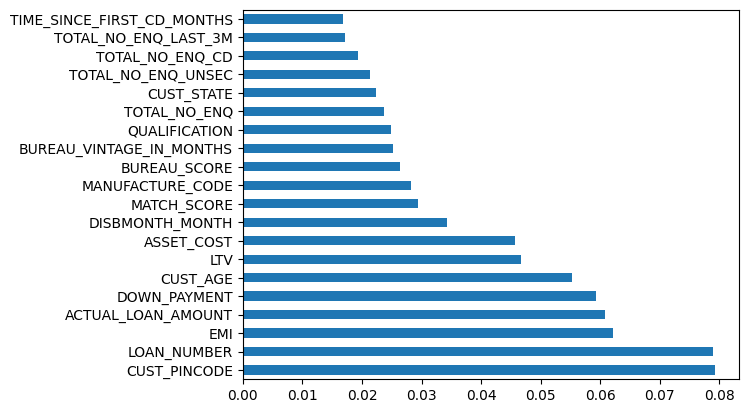

In [11]:
# Selecting top features

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(20).plot(kind='barh')
top_features = feature_importance.nlargest(20).index
X_selected = X[top_features]

# Display selected top features
print("Selected Top Features:\n", X_selected.head())

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Assuming 'df' is your DataFrame and 'TARGET_VARIABLE' is your target variable
X = df.drop('TARGET_VARIABLE', axis=1)
y = df['TARGET_VARIABLE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with imputation and model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('classifier', SVC())  # Initialize the SVM classifier
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Additional feature extraction using forward selection: # Take so much time

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

def forward_feature_selection(X, y, model, cv=5):
    selected_features = []
    remaining_features = list(X.columns)
    best_score = 0
    while remaining_features:
        scores = []
        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_subset = X[current_features]
            score = np.mean(cross_val_score(model, X_subset, y, cv=cv))
            scores.append((score, feature))
        
        scores.sort(reverse=True)
        best_new_score, best_new_feature = scores[0]
        
        if best_new_score > best_score:
            selected_features.append(best_new_feature)
            remaining_features.remove(best_new_feature)
            best_score = best_new_score
            print(f"Selected feature: {best_new_feature}, Cross-Validation Score: {best_new_score}")
        else:
            break
    
    return selected_features

# Example usage
# Assuming df is your DataFrame and 'TARGET_VARIABLE' is your target column
features = df.drop(columns=['TARGET_VARIABLE'])
target = df['TARGET_VARIABLE']

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Perform forward feature selection
selected_features = forward_feature_selection(features, target, rf_classifier)

# Train and evaluate the model with selected features
X_selected = features[selected_features]
rf_classifier.fit(X_selected, target)

# Assuming X_test and y_test are defined elsewhere in your code
X_test_selected = X_test[selected_features]
y_pred_test = rf_classifier.predict(X_test_selected)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy with Selected Features:", accuracy_test)